In [1]:
import numpy as np
import tensorflow as tf
np.random.seed(42)
tf.random.set_seed(42)

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.datasets.fashion_mnist import load_data
import matplotlib.pyplot as plt
(x_data,y_data),(t_x_data,t_y_data) = load_data()
x_data=x_data.reshape(-1,28,28,1)/255.0
t_x,tt_x,t_y,tt_y = train_test_split(x_data,y_data,test_size=0.2,random_state=42)

In [3]:
m=keras.Sequential()
m.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same'
                          ,input_shape=(28,28,1)))
m.add(keras.layers.MaxPooling2D(2))
m.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
m.add(keras.layers.MaxPooling2D(2))

In [4]:
m.add(keras.layers.Flatten())
m.add(keras.layers.Dense(100,activation='relu'))
m.add(keras.layers.Dropout(0.4))
m.add(keras.layers.Dense(10,activation='softmax'))
m.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [5]:
ck_p = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', 
                                                save_best_only=True)
e_stopping= keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)
history = m.fit(t_x, t_y, epochs=20,
                    validation_data=(tt_x, tt_y),
                    callbacks=[ck_p, e_stopping])

Epoch 1/20
1500/1500 [==============================] - 27s 18ms/step - loss: 0.5394 - accuracy: 0.8067 - val_loss: 0.3351 - val_accuracy: 0.8762
Epoch 2/20
1500/1500 [==============================] - 27s 18ms/step - loss: 0.3576 - accuracy: 0.8706 - val_loss: 0.2797 - val_accuracy: 0.8970
Epoch 3/20
1500/1500 [==============================] - 27s 18ms/step - loss: 0.3079 - accuracy: 0.8894 - val_loss: 0.2629 - val_accuracy: 0.9026
Epoch 4/20
1500/1500 [==============================] - 26s 18ms/step - loss: 0.2735 - accuracy: 0.9008 - val_loss: 0.2406 - val_accuracy: 0.9089
Epoch 5/20
1500/1500 [==============================] - 27s 18ms/step - loss: 0.2466 - accuracy: 0.9090 - val_loss: 0.2509 - val_accuracy: 0.9078
Epoch 6/20
1500/1500 [==============================] - 27s 18ms/step - loss: 0.2297 - accuracy: 0.9168 - val_loss: 0.2245 - val_accuracy: 0.9161
Epoch 7/20
1500/1500 [==============================] - 27s 18ms/step - loss: 0.2122 - accuracy: 0.9206 - val_loss: 0.2209 -

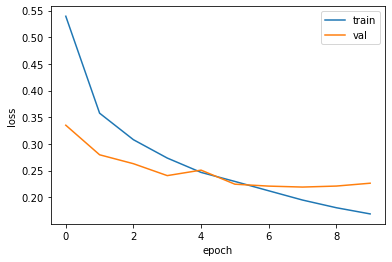

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [7]:
m.evaluate(tt_x, tt_y)

375/375 [==============================] - 4s 9ms/step - loss: 0.2191 - accuracy: 0.9231


[0.219148188829422, 0.9230833053588867]

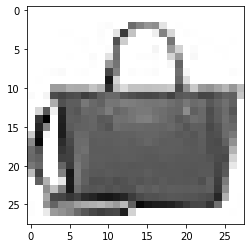

In [8]:
plt.imshow(tt_x[0].reshape(28,28),cmap='gray_r')
plt.show()

In [9]:
ck_data=m.predict(tt_x[0:1])

<BarContainer object of 10 artists>

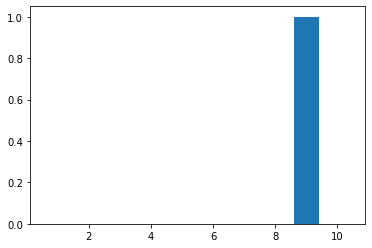

In [10]:
plt.bar(range(1,11),ck_data[0])